In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes1/diabetes.csv


In [3]:
#read data
data = pd.read_csv('/kaggle/input/diabetes1/diabetes.csv')

In [4]:
#present the first 5 rows 
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# __Data Explanation__
___
* Pregnancies:the number of pregnancies the patient has had.
* Glucose: The blood glucose level.
* BloodPressure: The blood pressure level.
* SkinThickness: The thickness of the skin fold.
* Insulin: The insulin level in the blood.
* BMI: Body Mass Index.
* DiabetesPedigreeFunction: A measure of family history related to diabetes.
* Age: The age of the patient.

In [5]:
# describe numerical data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# __data preprocessing and visualization__

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

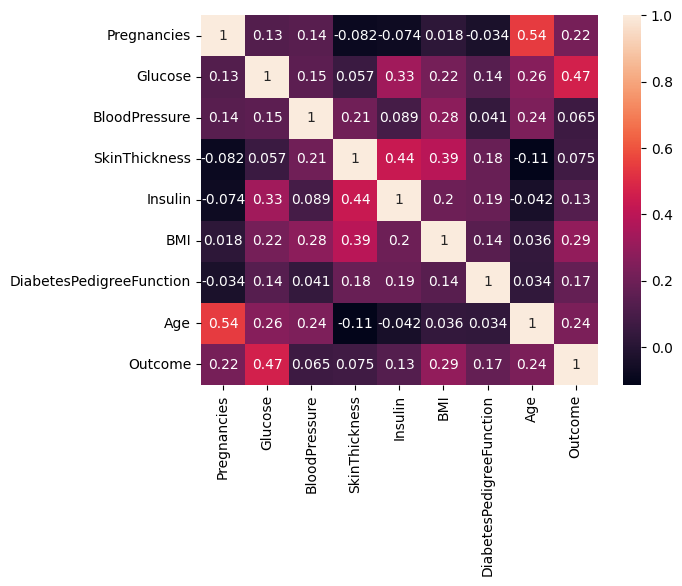

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data.corr() ,annot = True)
plt.show()

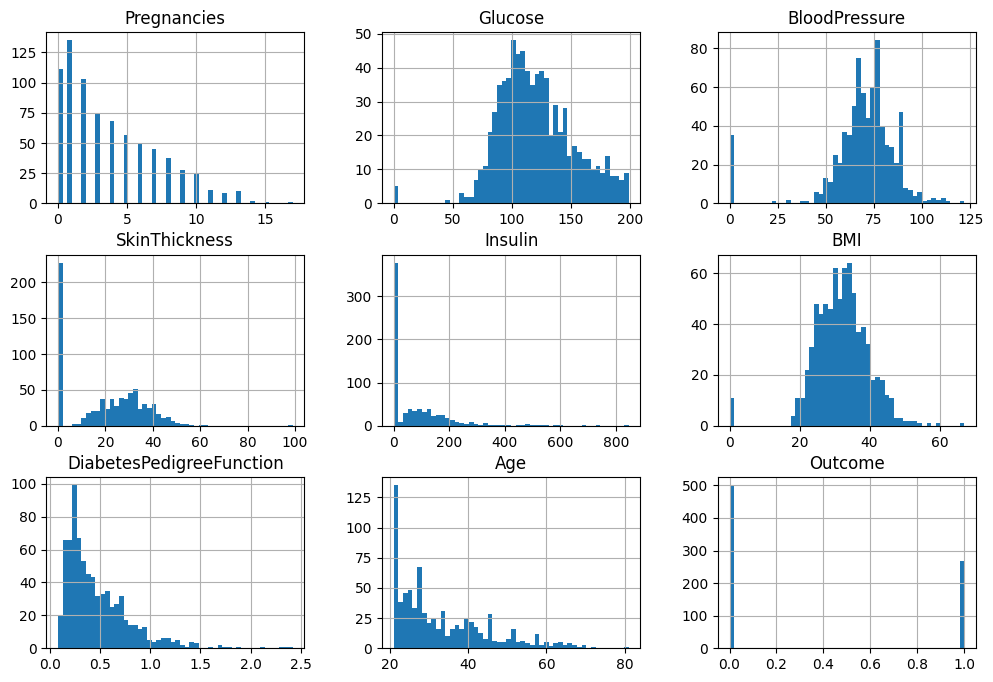

In [9]:
data.hist(bins=50 , figsize=(12,8))
plt.show()

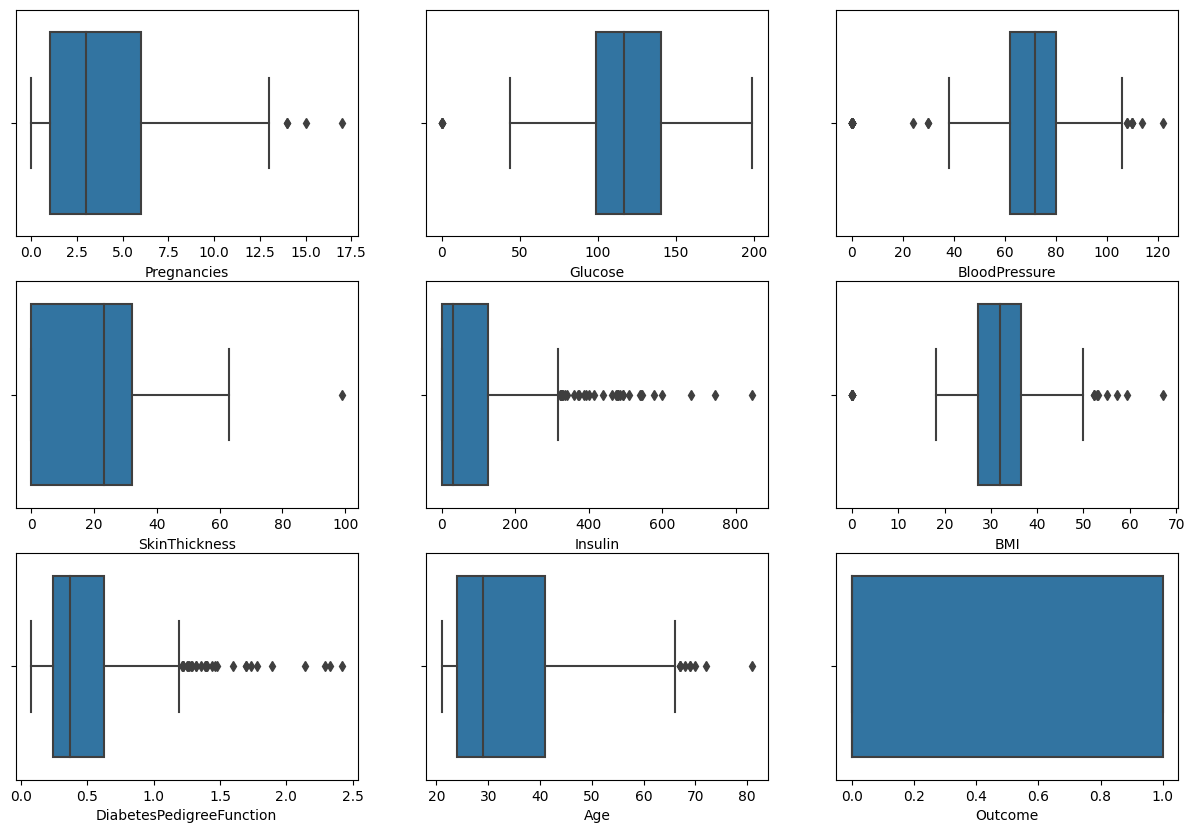

In [10]:
#check outliers

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(x=data['Pregnancies'])
plt.subplot(3,3,2)
sns.boxplot(x=data['Glucose'])
plt.subplot(3,3,3)
sns.boxplot(x=data['BloodPressure'])
plt.subplot(3,3,4)
sns.boxplot(x=data['SkinThickness'])
plt.subplot(3,3,5)
sns.boxplot(x=data['Insulin'])
plt.subplot(3,3,6)
sns.boxplot(x=data['BMI'])
plt.subplot(3,3,7)
sns.boxplot(x=data['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
sns.boxplot(x=data['Age'])
plt.subplot(3,3,9)
sns.boxplot(x=data['Outcome'])
plt.show()

In [11]:
data = data[~((data['Pregnancies'] > 13) |
              (data['Glucose'] < 50) |
              (data['BloodPressure'] < 40) |
              (data['BloodPressure'] > 100) |
              (data['SkinThickness'] > 80) |
              (data['Insulin'] > 300) |
              (data['BMI'] < 10) |
              (data['BMI'] > 50) |
              (data['DiabetesPedigreeFunction'] > 1) |
              (data['Age'] > 65))]

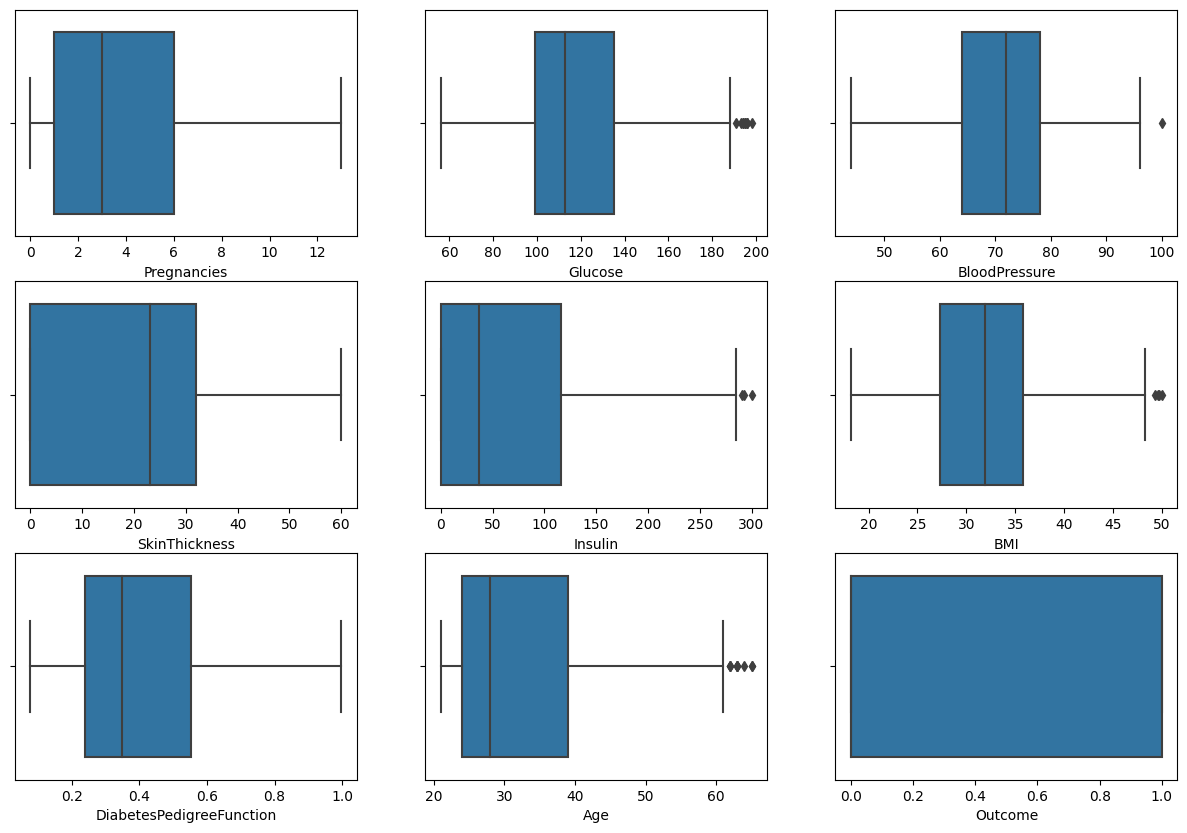

In [12]:
#check outliers
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(x=data['Pregnancies'])
plt.subplot(3,3,2)
sns.boxplot(x=data['Glucose'])
plt.subplot(3,3,3)
sns.boxplot(x=data['BloodPressure'])
plt.subplot(3,3,4)
sns.boxplot(x=data['SkinThickness'])
plt.subplot(3,3,5)
sns.boxplot(x=data['Insulin'])
plt.subplot(3,3,6)
sns.boxplot(x=data['BMI'])
plt.subplot(3,3,7)
sns.boxplot(x=data['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
sns.boxplot(x=data['Age'])
plt.subplot(3,3,9)
sns.boxplot(x=data['Outcome'])
plt.show()

In [13]:
data = data[~((data['Glucose'] > 180) |
              (data['BloodPressure'] >90) |
              (data['Insulin'] > 250) |
              (data['BMI'] > 45) |
              (data['Age'] > 60))]

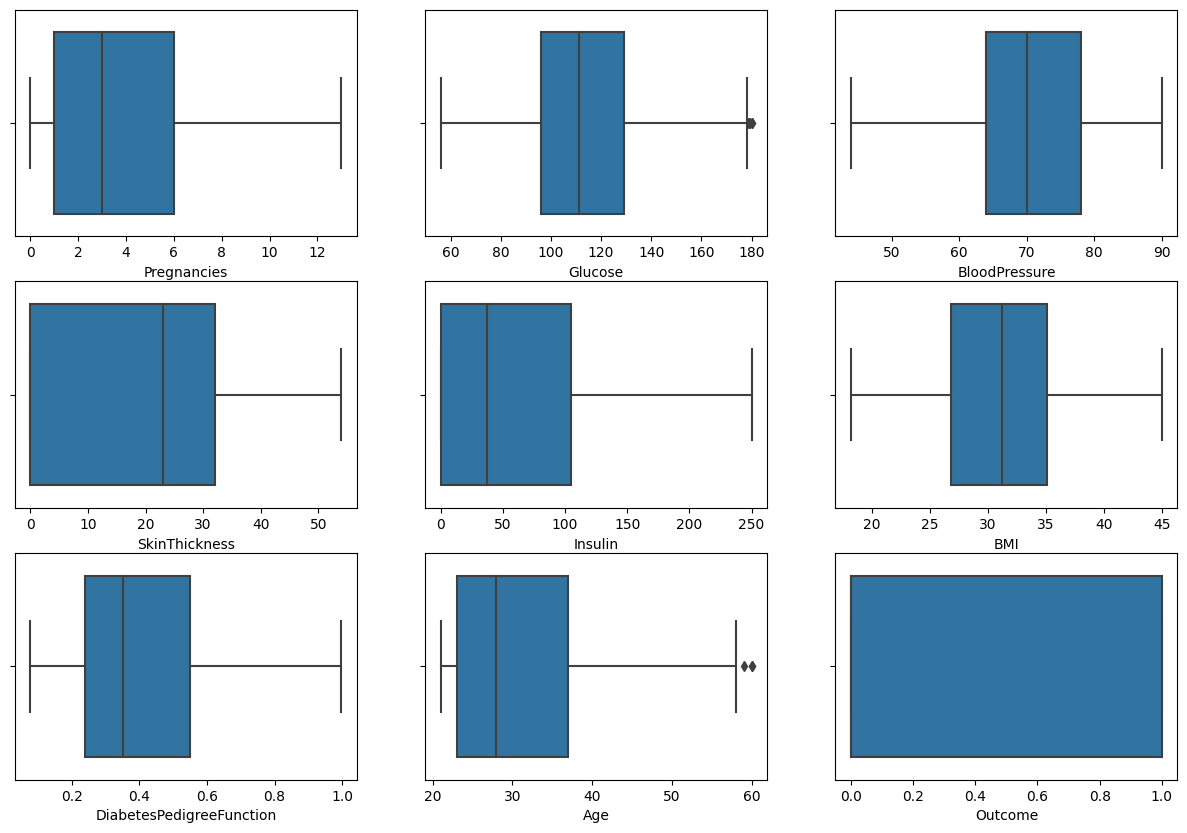

In [14]:
#check outliers

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(x=data['Pregnancies'])
plt.subplot(3,3,2)
sns.boxplot(x=data['Glucose'])
plt.subplot(3,3,3)
sns.boxplot(x=data['BloodPressure'])
plt.subplot(3,3,4)
sns.boxplot(x=data['SkinThickness'])
plt.subplot(3,3,5)
sns.boxplot(x=data['Insulin'])
plt.subplot(3,3,6)
sns.boxplot(x=data['BMI'])
plt.subplot(3,3,7)
sns.boxplot(x=data['DiabetesPedigreeFunction'])
plt.subplot(3,3,8)
sns.boxplot(x=data['Age'])
plt.subplot(3,3,9)
sns.boxplot(x=data['Outcome'])
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

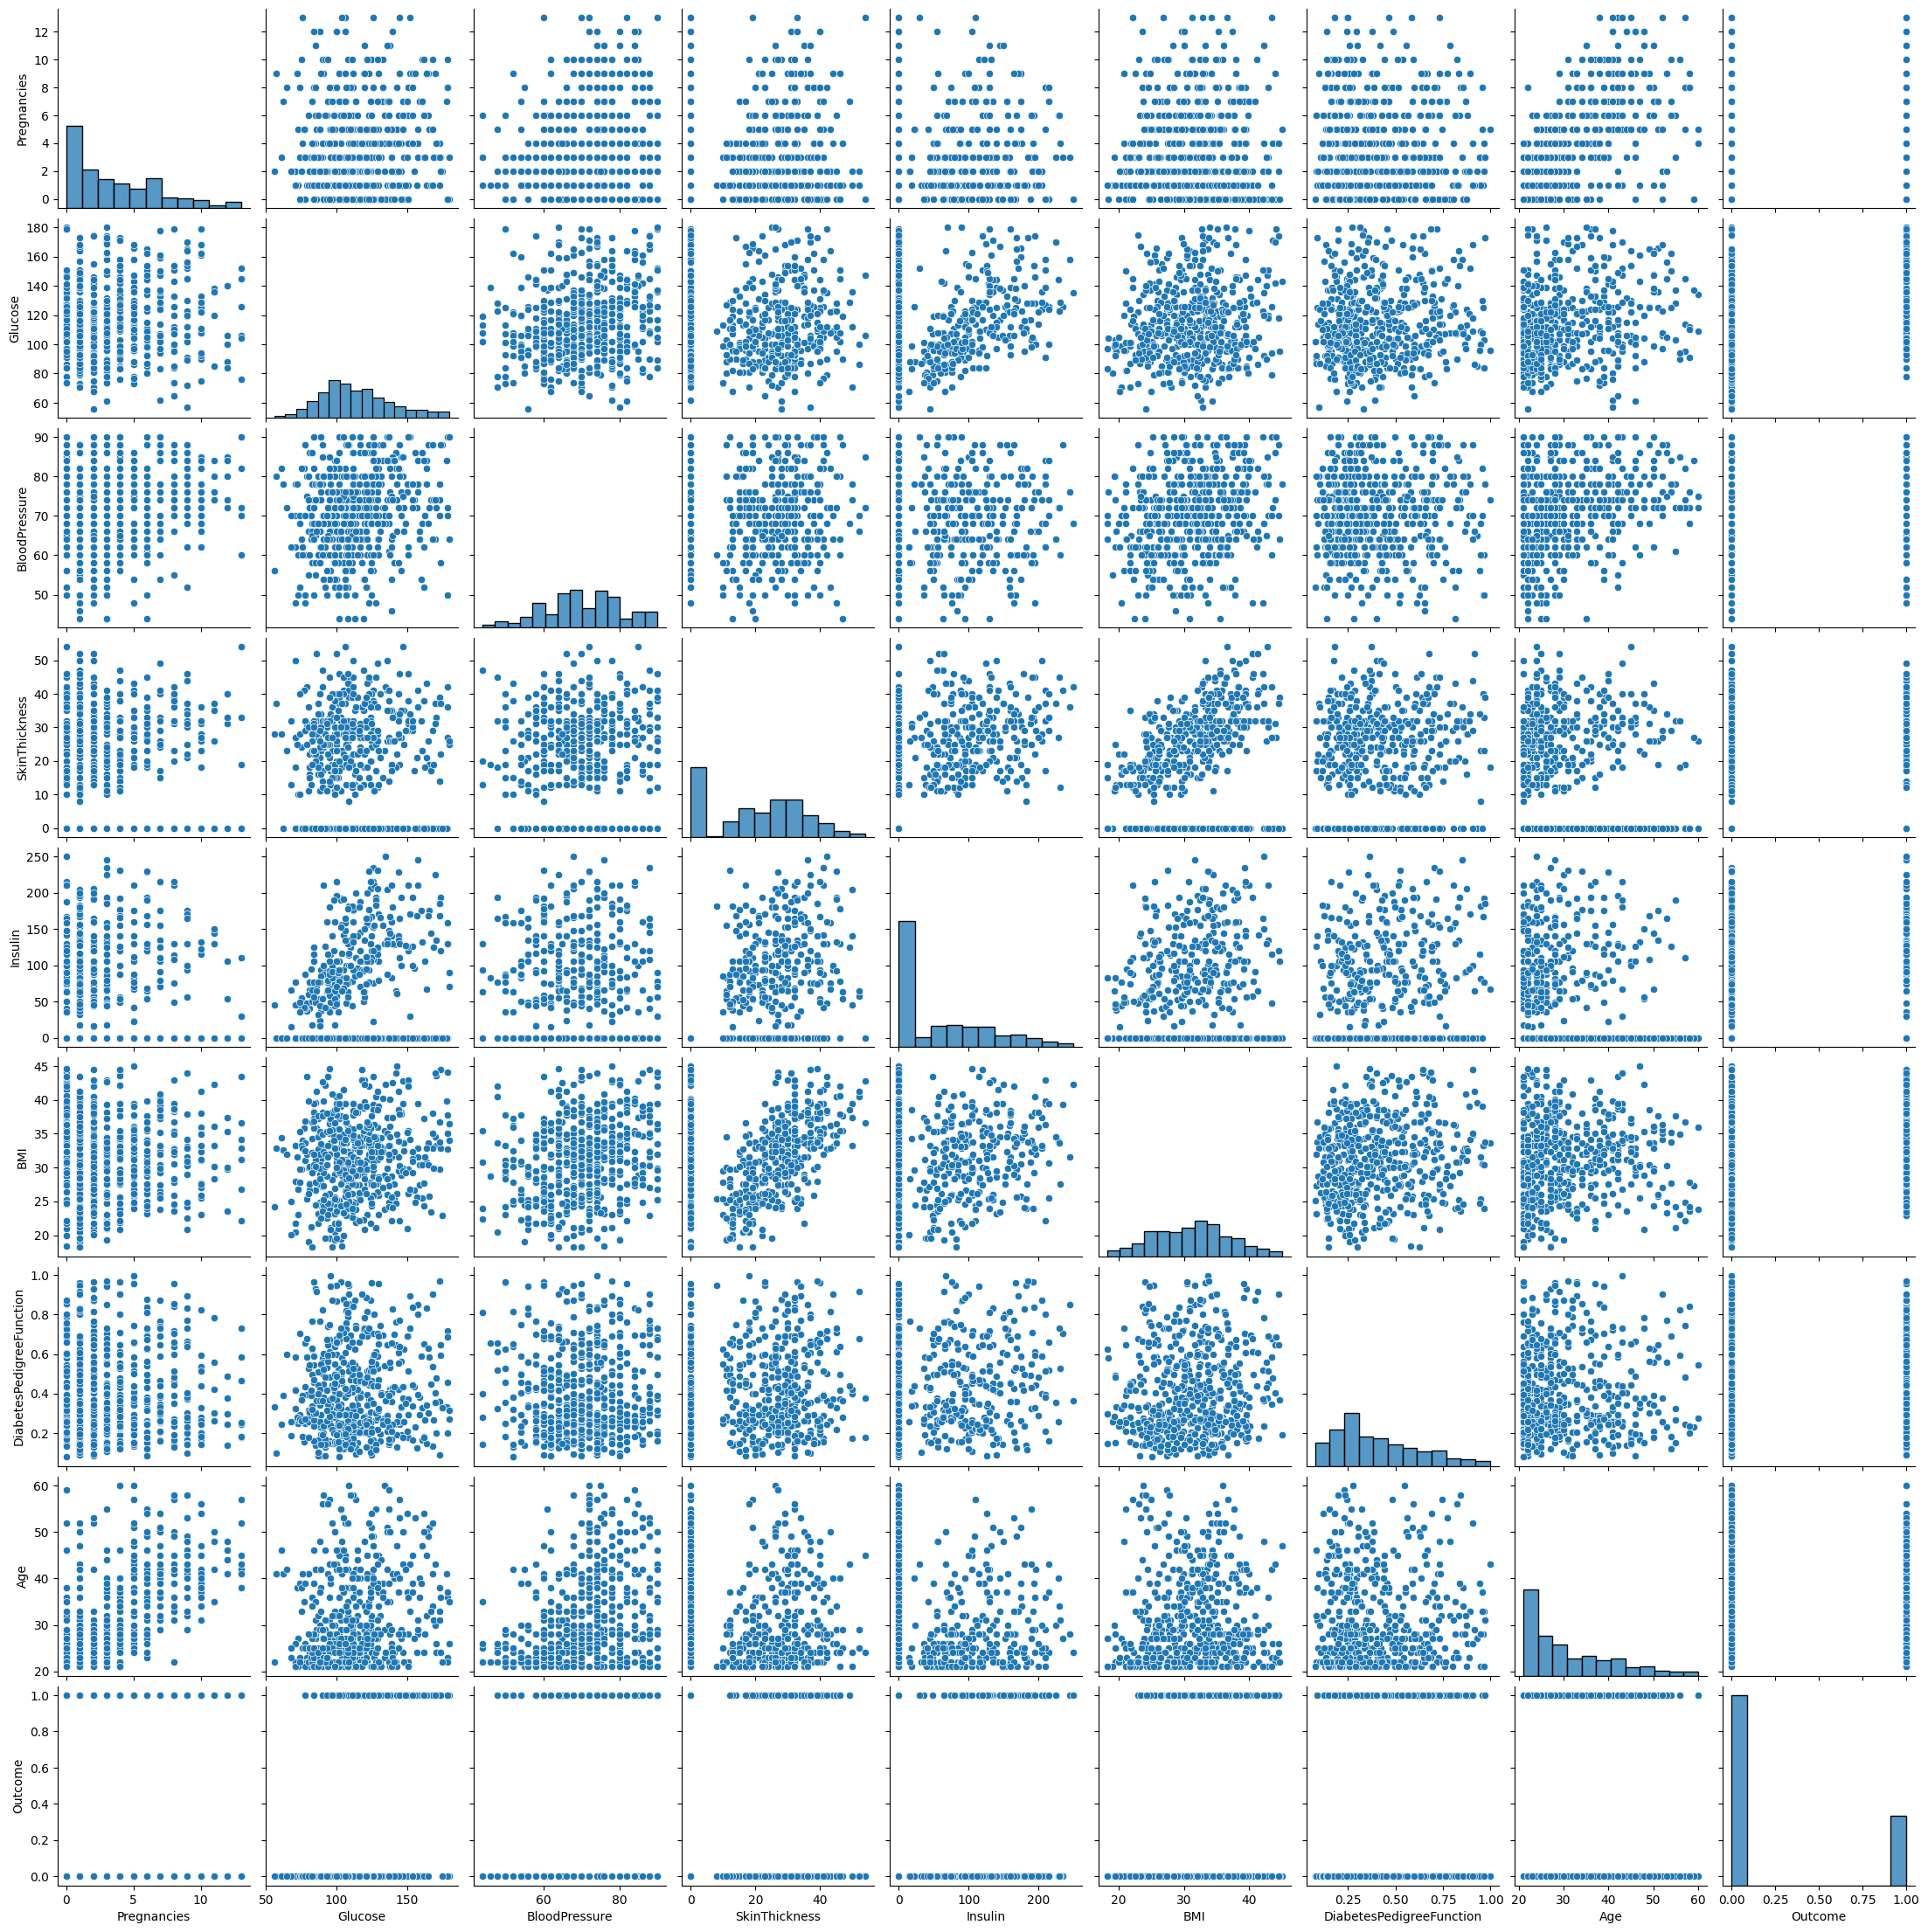

In [15]:
sns.pairplot(data)

# __Training and Testing Data__

In [16]:
#splitting data into features and target
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [17]:
#splitting data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2 , random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(420, 8)
(105, 8)
(420,)
(105,)


In [18]:
# fit the model
from sklearn.svm import SVC # C => for Classification

model = SVC(kernel='linear')  

model.fit(x_train,y_train)

SVC(kernel='linear')

In [19]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Convert x_test to NumPy array if it is a DataFrame
# if isinstance(x_test, pd.DataFrame):
#     x_test = x_test.to_numpy()

# # Generate a mesh grid for plotting the decision boundary
# x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
# y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
# xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
#                      np.arange(y_min, y_max, 0.02))

# # Predict the class for each point in the mesh grid
# Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Z = Z.reshape(xx.shape)

# # Plotting the decision boundary
# plt.figure(figsize=(10, 8))
# plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')

# # Plotting the test data points
# sns.scatterplot(x=x_test[:, 0], y=x_test[:, 1], hue=y_test, style=y_pred, palette='viridis', s=80)

# # Plotting decision boundary
# w = model.coef_[0]
# b = model.intercept_[0]
# x_points = np.linspace(x_min, x_max, 100)
# y_points = -(w[0] * x_points + b) / w[1]
# plt.plot(x_points, y_points, 'k--', label='Decision Boundary')

# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.title('SVC Decision Boundary and Test Data')
# plt.legend()
# plt.show()

Accuracy: 0.8190
Precision: 0.6000
Recall: 0.5217
F1 Score: 0.5581


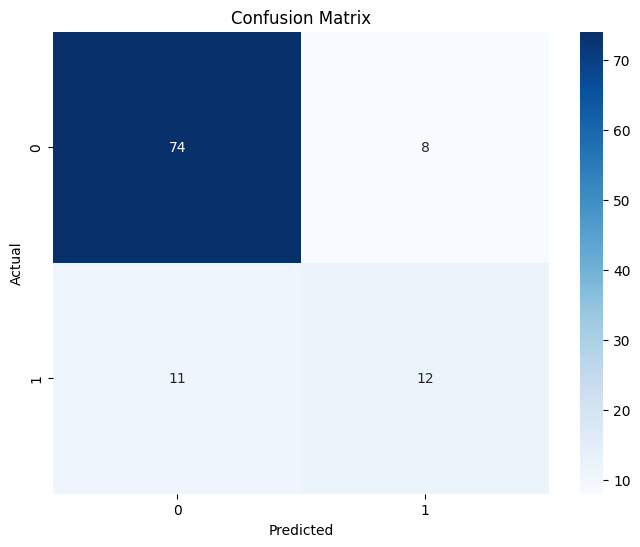

In [20]:
# Calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary') 
recall = recall_score(y_test, y_pred, average='binary')        
f1 = f1_score(y_test, y_pred, average='binary')                

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()